# Brief outline of the notebook

1. Data Introduction
2. Data Wrangling
3. Modelling
4. Evaluation
5. Conclusion

# Data introduction

This project will use data from the houseprice dataset. The houseprice dataset includes all features that can potentially positively or negatively affect the price a house is sold.it also contains a price column that will be used target column which will then be used to model.

# Housing Data Dictionary

id - Unique ID for each home sold

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Data Wrangling

In [1]:
#import the necessary libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data from a .csv in the same folder and  explore the top 5 rows of the df
df= pd.read_csv('houseprice_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#move target column to the last column
#this is not compulsory but its best practice

s = df.pop('price')
new_df = pd.concat([df, s], 1)
new_df

C:\Users\antho\AppData\Local\Temp/ipykernel_32808/2307992120.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  new_df = pd.concat([df, s], 1)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


In [4]:
#check the type of each column
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price 

In [5]:
#check the number of rows and columns respectively
new_df.shape

(21613, 19)

In [6]:
# data.isnull() # shows a dataframe with the information whether a data point is missing
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
#True=1 and false =0
# This will give us the total number of missing values feature-wise
#luckily all data in this dataset are numerical
new_df.isnull().sum()
#Result shows no missing value in the dataset

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [7]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
#This is not necessary as all data in this dataset are numerical
new_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.401822e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.673622e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


<AxesSubplot:>

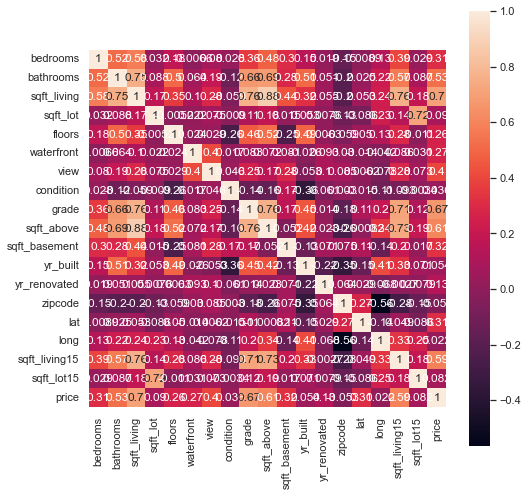

In [8]:
#Heatmap tol show corellation of all features with one another
fig=plt.figure(figsize=(8,8))
sns.heatmap(new_df.corr(), annot=True, square=True)

In [9]:
#Breakdown of correlation of other feature to the Target (Price)
new_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
zipcode         -0.053168
Name: price, dtype: float64

# Modelling and Evaluation

Simple Linear Regression

In [10]:
#First we perform a simple Linear regression of 
#Declare the dependent x and independent variable y
#x is also called input or feature and y is called output or Target
#This will be used interchangeably in this nootbook
#Price  as target feature y
#Dependent Feature x as the most correllated (Sqft_living)
#For better understanding we will stick with x and y naming convention through out this neetbook

x= new_df.iloc[:,[2]].values
y= new_df.iloc[:,-1].values

C:\Users\antho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Square of Living Area')

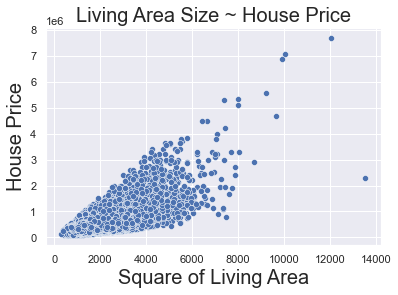

In [11]:
#Let visualize the input and target variable in a 2d plot
#We use lim  functionto fit the scale of the graph

sns.scatterplot(new_df.sqft_living,new_df.price)
plt.title('Living Area Size ~ House Price', size=20)
plt.ylabel('House Price', size=20)
plt.xlabel('Square of Living Area', size=20)


In [12]:
#split the data
# Split the variables with an 80-20 split and some random state
#Note that the data can also be split into 60/40, 70/30 or 90/10
#its ideal to train the model with more data and test with less
# Random state -when random_state set to an integer, train_test_split will return same results for each execution.
#In this model we have chosen Random state of 1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [13]:
# Create an instance of linear regression object
reg = LinearRegression()
# Fit the regression with the TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [14]:
# Obtain the bias (intercept) of the regression
reg.intercept_
# Note that the result is a float as we usually expect a single value

-42291.12839802599

In [15]:
# Obtain the weights (coefficients) of the regression
reg.coef_
# Note that the output is an array
#Python expects more input variable hence the reason for the array (square bracket)
# A positive weight indicates that as a value so does the log price and price
# A negative weight shows that as a feature increases the price and log price decreases

array([279.73977846])

Text(0, 0.5, ' House Price')

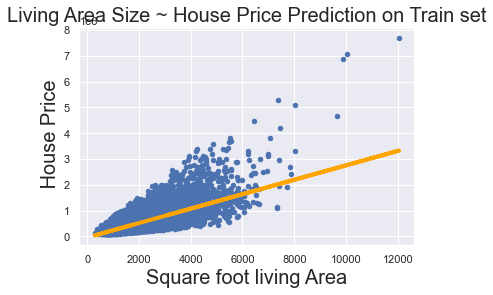

In [16]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
#y_hat = reg.predict(x_train)
#use the lim function to fit the scale of the graph

plt.scatter(x_train,y_train,s=20)
y_hat = reg.predict(x_train)
fig = plt.plot(x_train,y_hat, lw=4, c='orange', label ='regression line')
plt.title('Living Area Size ~ House Price Prediction on Train set', size=20)
plt.xlabel('Square foot living Area', fontsize = 20)
plt.ylabel(' House Price', fontsize = 20)



C:\Users\antho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

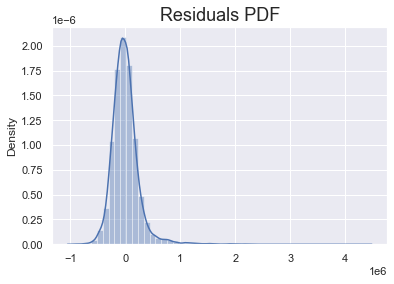

In [17]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

#Give a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many positive and a few negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets) and vice versa for positives
#This means our model is very bad at predicting very high house prices
#They underestimate the target
# This is food for thought to improve our model

In [18]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

Text(0, 0.5, ' House Price')

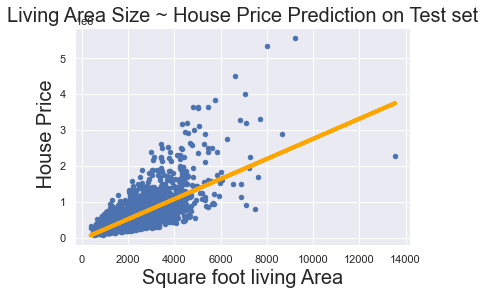

In [19]:
plt.scatter(x_test,y_test,s=20)
fig = plt.plot(x_test,y_hat_test, lw=4, c='orange', label ='regression line')
plt.title('Living Area Size ~ House Price Prediction on Test set', size=20)
plt.xlabel('Square foot living Area', fontsize = 20)
plt.ylabel(' House Price', fontsize = 20)

In [20]:
#The mean square error is the average of the square of the difference between the observed and predicted values of a variable
#This is high brcause of the different scale of the variables
Mean_squared =mean_squared_error(y_test, y_hat_test)
Mean_squared

76570251342.04109

In [21]:
#Measure of the goodness of fit
#Measures how well a linear regression fare and compare
#The measure is done on the test set
Coeff_determination =r2_score(y_test, y_hat_test)
Coeff_determination
#This model is explaining 49.4% of the variabiliy of the data
#We can better improve the model

0.4941006145983624

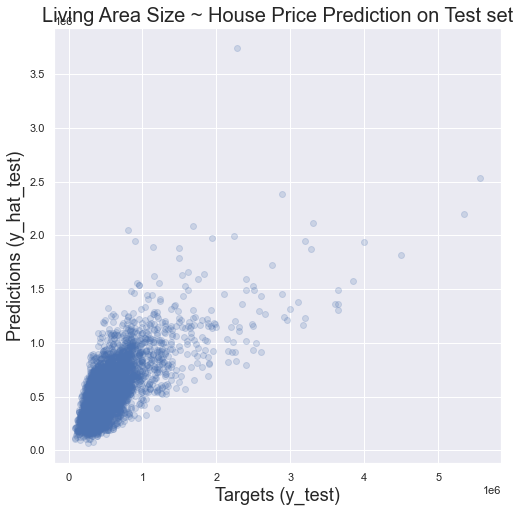

In [22]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.title('Living Area Size ~ House Price Prediction on Test set', size=20)

plt.show()

#The darker part of the graph are predictions our model made correctly


# Multiple Linear Regression
we perform same process as the Linear Regression but this time with 2 variables

In [23]:
# The inputs are chosen based on corellation but always remember corellation does not necessarily mean causality
x= new_df.iloc[:,[2,8]].values

y= new_df.iloc[:,-1].values

In [24]:
#again split the data into test annd train set
#to get the same split, use same random state and in this case we chose -----
#Note that model result changes with change in random state
#We have chosen 80/20 split for the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [25]:
#Create a Linear Regression instance and fit the test and train data
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
# Obtain the weights (coefficients) of the regression
reg.coef_
# As usual the output is an array
# A positive weight indicates that as a value so does the log price and price
#The difference in scale of both inputs accounts for this high weight values
#Standardizing or label encoding the inputs is a good way to deal with this

array([  185.21098081, 96340.82360396])

In [27]:
## Obtain the bias (intercept) of the regression
reg.intercept_

-583626.1782628887

In [28]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

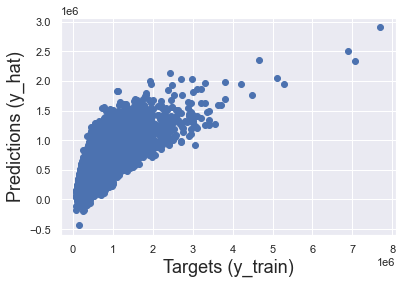

In [29]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
# for a multiple regression fitting the regression line is more dificult as its 3 dimemsional and above
# But we can always fir the 45 dregree line -------
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

C:\Users\antho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

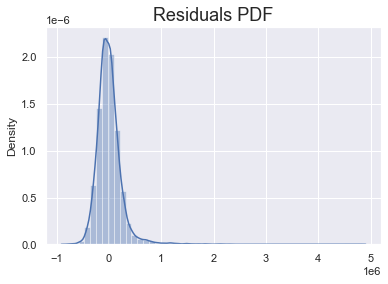

In [30]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
#These are the differences between the target and prediction
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many positive residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets) and vice versa
#This plot is more skewed to the right
#Meaning the model is better at predicing lower house prices
#They underestimate the target
# This is food for thought to improve our model

In [31]:
#Test set predictions
y_hat_test = reg.predict(x_test)

In [32]:
#Mean squared Error is the average squared difference between the estimated values and true value
#It is very large are features are scaled differently
#We really cant make much insight from this
#Scaling features will give a better understanding
Mean_squared =mean_squared_error(y_test, y_hat_test)
Mean_squared

69909861244.17856

In [33]:
#lets check the r2_score
Coeff_determination =r2_score(y_test, y_hat_test)
Coeff_determination
#This model is explaining 53.8% of the variabiliy of the data
#its is neither a good or bad score but can be better

0.5381057889054472

In [34]:
## Obtain the bias (intercept) of the regression
reg.intercept_

-583626.1782628887

In [35]:
#Check the train score
reg.score(x_train,y_train)

0.5333409854028585

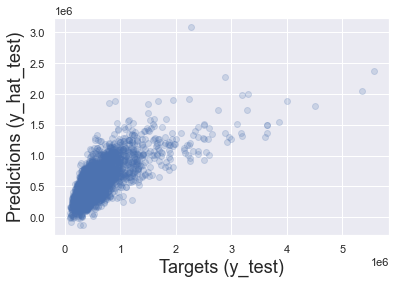

<Figure size 864x864 with 0 Axes>

In [36]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph

plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.figure(figsize=(12,12))
plt.show()
#The darker part of the graph are predictions our model made correctly

# Multiple Regression 2

In [37]:
# The target(s) (dependent variable) is 'price'

# The inputs this type were chosen by intuition
# Housing price are most likely to be affected by -----
#Always remember corelation does not really imply causation
x= new_df.iloc[:,[2,8,0,1,6,14,15]].values
y= new_df.iloc[:,-1].values

In [38]:
#Split the data set again and assign a random state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [39]:
#Create an instance of the regression class
reg= LinearRegression()

In [40]:
#Fit the model
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# A positive weight indicates that as a value so does the log price and price
# A negative weight shows that as a feature increases the price and log price decreases

array([ 2.09676659e+02,  7.53433706e+04, -2.77888341e+04, -6.56206542e+03,
        8.82728056e+04,  6.24915067e+05, -2.35408249e+05])

In [42]:
## Obtain the bias (intercept) of the regression
reg.intercept_

-58878139.52831826

In [43]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

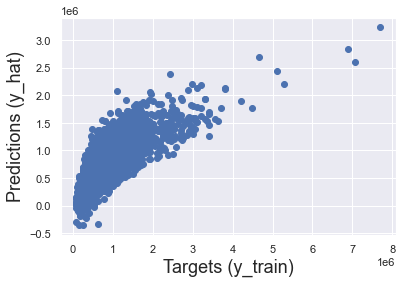

<Figure size 864x864 with 0 Axes>

In [44]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.figure(figsize=(12,12))

plt.show()

C:\Users\antho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

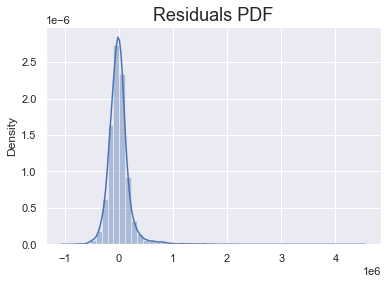

In [45]:
# We can also plot the Probabilty distribution of the residuals and check for anomalies
#These are the differences between the target and prediction
sns.distplot(y_train - y_hat)
#Give a title
plt.title("Residuals PDF", size=18)

#They underestimate the target
# This is food for thought to improve our model

In [46]:
#Test set predictions
y_hat_test = reg.predict(x_test)

In [47]:
#Mean squared Error is the average squared difference between the estimated values and true value
#It is very large are features are scaled differently
#We really cant make much insight from this
#Scaling features will give a better understanding
Mean_squared =mean_squared_error(y_test, y_hat_test)
Mean_squared

53028138378.3976

In [48]:
#lets check the r2_score
Coeff_determination =r2_score(y_test, y_hat_test)
Coeff_determination
#This model is predicting 53.8% of the variabiliy of the data
#its is neither a good or bad score but can be better


0.6496432734066924

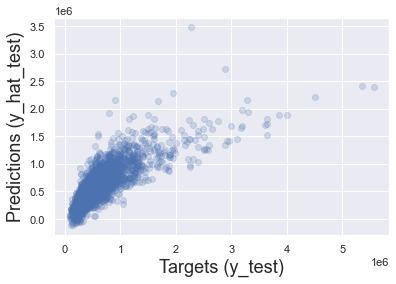

In [49]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

plt.show()
#The darker part of the graph are predictions our model made correctly

# Multiple Regression 3

C:\Users\antho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

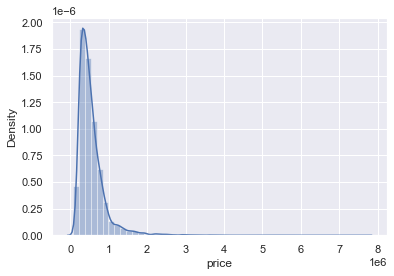

In [50]:
#Plot the probabilty distribution function for price
sns.distplot(new_df['price'])
#We can see price is exponentially distributed
#this is surely a problem for regression as it should ne normally distributed

<AxesSubplot:>

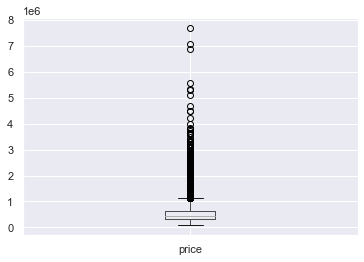

In [51]:
#A box plot of the price further shows its outliers

new_df.boxplot(column='price')
#There is need to renmove these outliers to avoid errors in our model

In [52]:
#Make a copy of the data set
#This is best practive to avoid altering intial data set
data_1= new_df.copy()


In [53]:
# From the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
#We perform a log tranformation and add the new log_price to the data frame

log_price = np.log(data_1['price'])
data_1['log_price'] = log_price

In [54]:
# When we remove observations, the original indexes are preserved
# Reseting the index creates  a new column containing the old index sometimes
# We won't be needing it, thus 'drop=True' to completely forget about it

data_cleaned= data_1.reset_index(drop=True)

In [55]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['price'],axis=1)

In [56]:
# The inputs are selected based on intuition
# its made of what an average person looks out for in terms of house
# Note that these choices may differ from person to person
x= data_cleaned.iloc[:,[2,8,0,1,6,14,15]].values

# The target(s) (dependent variable (y)) is 'log price'
y= data_cleaned.iloc[:,-1].values

In [57]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(x)

StandardScaler()

In [58]:
# Scale the features and store them in a new variable (the actual scaling procedure)
x_scaled = scaler.transform(x)

In [59]:
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 1
# Results can be compared by changing the random state and taking the average

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=42)

In [60]:
#Create an instance of the regression class
reg= LinearRegression()

In [61]:
#fit the scaled model 
reg.fit(x_train,y_train)

LinearRegression()

In [62]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

In [63]:
## Obtain the bias (intercept) of the regression
reg.intercept_

13.046695019194331

In [64]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# A positive weight indicates that as a value so does the log price and price
# A negative weight shows that as a feature increases the price and log price decreases
#weights are interpretable as the scale of the inputs are the same

array([ 0.20434922,  0.16855825, -0.00240982,  0.01301812,  0.07807395,
        0.20330108, -0.02347582])

In [65]:
#Mean squared Error is the average squared difference between the estimated values and true value
#Scaling features will give a better understanding
Mean_squared =mean_squared_error(y_test, reg.predict(x_test))
Mean_squared

0.07738120752272788

In [66]:
#Lets check the r2_score
Coeff_determination =r2_score(y_test, reg.predict(x_test))
Coeff_determination
#This model is predicting 72.8% of the variabiliy of the data

0.7286677742716462

In [67]:
#lets check the r2_score of the train set
reg.score(x_train,y_train)
#This model is predicting 72.6% of the variabiliy of the data
#the test score of a model should be slightly lower than the train score
# in this case we can say our model is slightly overfitted but the difference is low and this can be over looked

0.7266439175825907

#The adjusted r2 is also an important factor

#This can help check if we were penalised for excessive use of features

$R^2_{adj.} = 1-(1-R^2)*\frac{n-1}{n-p-1}$

$C= \frac{3(k-1)} {2(2k-1)   +   4kp(p+2)}$

In [68]:
#Compute the adjusted r2
r2= reg.score(x_train,y_train)
n= x.shape[0]
p= x.shape[1]

Ar2= 1-(1-r2)*(n-1)/(n-p-1)
Ar2

0.7265553504649365

In [69]:
#Mean squared Error is the average squared difference between the estimated values and true value
#Scaling features will give a better understanding
Mean_squared =mean_squared_error(y_test, reg.predict(x_test))
Mean_squared

0.07738120752272788

In [70]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat= reg.predict(x_train)

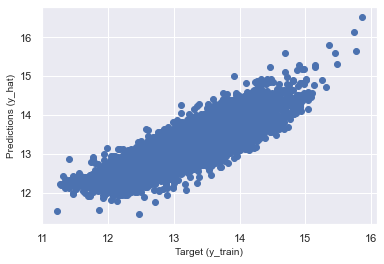

In [71]:

plt.scatter(y_train,y_hat)
plt.xlabel('Target (y_train)', size = 10)
plt.ylabel('Predictions (y_hat)', size = 10)

plt.show()

C:\Users\antho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

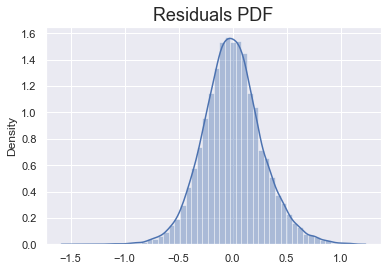

In [72]:
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)


#The result is almost a normal distribution
#the model overestimate the prices but rarely underestimate the target
# We can further looking into ways of improving our models based on this

In [73]:
y_hat_test= reg.predict(x_test)

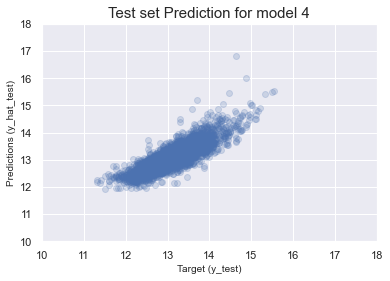

In [74]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
#As stated moded underestimate prices slightly

plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel('Target (y_test)', size = 10)
plt.ylabel('Predictions (y_hat_test)', size = 10)
plt.title('Test set Prediction for model 4', size=15)
plt.xlim(10,18)
plt.ylim(10,18)
plt.show()

#The darker part of the graph are predictions our model made correctly

In [75]:
#Lets create a column for prediction
#This is unconventinal
#But we can manaually explore the algorithm predictions
df_pf = pd.DataFrame(np.exp(y_hat_test), columns =['Prediction'])
df_pf.head()

,Prediction
0,3.939281e+05
1,6.943561e+05
2,1.302050e+06
3,2.263801e+06
4,7.002703e+05


In [76]:
# Let's create a 'Target' column with the appropriate values
#This will help us compare results with predictions
# we need the exponential of the test log price
#This is because we took a log of the Target variable price
df_pf['Target']= pd.DataFrame(np.exp(y_test))

df_pf



,Prediction,Target
0,3.939281e+05,365000.0
1,6.943561e+05,865000.0
2,1.302050e+06,1040000.0
3,2.263801e+06,1490000.0
4,7.002703e+05,711000.0
...,...,...
4318,4.663544e+05,338000.0
4319,5.499621e+05,673000.0
4320,3.505194e+05,285000.0
4321,5.054788e+05,605000.0


In [77]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Residual']= df_pf['Target']- df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,3.939281e+05,365000.0,-28928.111970,7.925510
1,6.943561e+05,865000.0,170643.850189,19.727613
2,1.302050e+06,1040000.0,-262050.036115,25.197119
3,2.263801e+06,1490000.0,-773800.805027,51.932940
4,7.002703e+05,711000.0,10729.733707,1.509105
...,...,...,...,...
4318,4.663544e+05,338000.0,-128354.379840,37.974669
4319,5.499621e+05,673000.0,123037.871953,18.282002
4320,3.505194e+05,285000.0,-65519.350650,22.989246
4321,5.054788e+05,605000.0,99521.187691,16.449783


In [78]:
# Exploring the descriptives here gives us additional insights
#This help us evaluate aggregate performance of the model
df_pf.describe()

#Minimun difference in percentage is very low meaning our output is great
#But the maximum percentage  is quite high
#Percentages inbetween are ok meaning our model are not bad but can be better
#an explanation is we might be missing an important feature that can drive the price of houses lower eithing from inputs we already have or inputs missing in our data


,Prediction,Target,Residual,Difference%
count,4.323000e+03,4.323000e+03,4.323000e+03,4323.000000
mean,5.323960e+05,5.494706e+05,1.707466e+04,21.832737
std,4.714441e+05,3.890883e+05,3.575368e+05,23.673300
min,1.493478e+05,8.250000e+04,-1.775098e+07,0.003639
25%,3.409239e+05,3.249500e+05,-6.600667e+04,8.100840
50%,4.443602e+05,4.550000e+05,-8.093917e+02,16.924821
75%,5.955886e+05,6.550000e+05,8.643893e+04,29.360349
max,2.003098e+07,5.570000e+06,1.657309e+06,778.551614


In [79]:
#Please refer to word document for the conclusion